# Sums and Products
## Sums

In engineering calculations you often need to calculate a summation... for example

$\large \sum_{i=1}^{n} x_i \label{eq1}\tag{1}$

One can implement \ref{eq1} in code as follows:




In [1]:
x = [12, 14, 11, 10, 15, 11]  # define x list
n = len(x)  # get length of list #n=6
summ = 0
for i in range(0, n):  # first list index is 0... so the i in the equation we are trying to calc.
    #i = 0,1,2,3,4,5
    summ +=  x[i]  # This loop will execute for i values of 0-5, which correspond to
print(summ)  # The six elements in x


73


### Mean and Standard Deviation

The mean for a set of values, $\bar{x}$ is defined as <br/><br/>
$\large \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} \label{eq2}\tag{2} $

The sample standard deviation is the square root of the sample variance and is found as follows:<br/><br/>

$ \large s = \sqrt[]{ \frac{\sum_{i=1}^{n} (x_i - \bar{x})}{n-1}} \label{eq3}\tag{3} $

In the cell below write your own code to find the mean and sample standard deviation of supplied list for $x$. Use Eqs. $\ref{eq2}$ and $\ref{eq3}$.



In [2]:
x = [3, 2, 4, 4, 3, 3, 2, 3, 4, 3, 3, 3, 2, 4]
#Place your code below

    

### More Summation Examples

Here is another summation:
$\large\sum_{i=1}^{n} i^3 \label{eq4}\tag{4}$

The code to calculate $\ref{eq4}$ is below.


In [3]:
summ = 0
n = 10
for i in range(0, n):
    summ += (i + 1) ** 3  # here we have to use i+1 since i is being used in the calculation
print(summ)

#To use the index as it is written (1 - 10) you would need to do the following:
summ = 0
for i in range(1, n+1):
    summ += i**3  # here we have to use i+1 since i is being used in the calculation
print(summ)



3025
3025


Here is another summation:
$\large\sum_{i=1}^{n} a^i \label{eq5}\tag{5}$

The code to calculate $\ref{eq5}$ is below.


In [4]:
summ = 0
n = 10
a = 2
for i in range(0, n):
    summ += a **(i+1)  # here we have to use i+1 since i is being used in the calculation
print(summ)

#Or if you want to make the summation look more like the equation...
summ = 0
for i in range(1, n+1):
    summ += a**(i)  # here we have to use i+1 since i is being used in the calculation
print(summ)


2046
2046


### Double Sums

Double summations come up pretty often. Here is an example:

$ \large \sum_{i=1}^{n} \sum_{j=1}^{n} \lvert a_{i,j} \rvert \label{eqn6}\tag{6} $

Eq. $\ref{eqn6}$ could be coded as shown below. Note without using numpy arrays, you actually need a list of lists to do this...



In [2]:
a = [[0.143, 0.357,2.01], [-1.31, 0.911, 1.99],[11.2, -4.30, -0.605]]   #this is a list of lists
#a above is like a matrix
summ = 0
n = len(a)     #note this will return 3 - the number of lists in the main list -- like rows in a matrix
for i in range(0,n):
    for j in range(0,n):
        summ+=abs(a[i][j])
        print(f"i={i} \t j={j} \t summ={summ}")    #this is included to show you how the indices work for nested loops

print(summ)


i=0 	 j=0 	 summ=0.143
i=0 	 j=1 	 summ=0.5
i=0 	 j=2 	 summ=2.51
i=1 	 j=0 	 summ=3.82
i=1 	 j=1 	 summ=4.731
i=1 	 j=2 	 summ=6.721
i=2 	 j=0 	 summ=17.921
i=2 	 j=1 	 summ=22.221
i=2 	 j=2 	 summ=22.826
22.826


### Infinite Sums

Many sums you need to calculate are infinite sums... not that you actually calculate them to inifinity (which I address below).

$\large\sum_{i=1}^{\infty} \frac{x^i}{i!} \label{eq7}\tag{7}$

In order to decide when to truncate the summation in code, we need the concept of fractional relative error, defined as: 

$\large \epsilon_r = \lvert \frac{f_i -f_{i-1}}{f_i} \rvert \label{eq8}\tag{8}$

where $f_i$ is the current iteration, $i$, value of some quantity you would like to calculate, and $f_{i-1}$ was the previous iteration calculated value for $f$.

The code below calculates $\ref{eq7}$ subject to $\epsilon_r$ (from $\ref{eq7}$) dropping below a stopping criterion, $\epsilon_s$ of $1x10^{-m}$ where $m$ can be changed to suit your needs.

In [6]:
from math import *
from tabulate import tabulate
# here is an example summation in eq. 4:
# here we are going to implement a loop that proceeds until the fractional relative error drops below 1e-5
# The fractional relative error is defined in Eq. 5 (we will use rel_err in the code below)
f = 0  # this is the function value we are calculating
f_old = 0  # holding place for old value of f in iterations
err_stop = 1e-9  # this is what is called the stopping criterion
rel_err = 1.1 * err_stop  # initially make sure rel_err is defined to be more than the err_stop
max_iter = 1000  # set a max number of iterations
x = 1  # argument of function in Eq. 4
f_string = "f"
i_string = "i"
rel_err_string = "rel err"
table = [[i_string,f_string,rel_err_string]]

for i in range(0, max_iter):  # for loop that will execute max_iter times unless there is a 'break'
    f = f + pow(x, i) / factorial(i)  # here we have to use i+1 since i is being used in the calculation
    if i > 0:  # calc rel_err for all iterations but the first
        rel_err = abs((f - f_old) / f)  # calc rel_err
        if rel_err <= err_stop:  # is rel_err less than the err_stop
            #print("%d %1.10wf  %1.3e" % (i+1,f, rel_err))
            #table.append([i,f,rel_err])
            table.append([i + 1, f"{f:.15e}", f"{rel_err:.2e}"])
            break  # if it is less then stop iterating
        else:  # if rel_err is still > than err_stop place the current value of f in f_old
            f_old = f  # the new value of f_old will be used in the next iteration
        table.append([i + 1, f"{f:.15e}", f"{rel_err:.2e}"])
    else:
        table.append([i+1, f"{f:.15e}", "NA"])
    #print("%d %1.10f  %1.3e" % (i + 1, f, rel_err))
    #print(f, i + 1, rel_err)

print(tabulate(table,tablefmt="fancy_grid", headers="firstrow"))


╒═════╤═════════╤═══════════╕
│   i │       f │ rel err   │
╞═════╪═════════╪═══════════╡
│   1 │ 1       │ NA        │
├─────┼─────────┼───────────┤
│   2 │ 2       │ 1.00e+00  │
├─────┼─────────┼───────────┤
│   3 │ 2.5     │ 2.00e-01  │
├─────┼─────────┼───────────┤
│   4 │ 2.66667 │ 6.25e-02  │
├─────┼─────────┼───────────┤
│   5 │ 2.70833 │ 1.54e-02  │
├─────┼─────────┼───────────┤
│   6 │ 2.71667 │ 3.07e-03  │
├─────┼─────────┼───────────┤
│   7 │ 2.71806 │ 5.11e-04  │
├─────┼─────────┼───────────┤
│   8 │ 2.71825 │ 7.30e-05  │
├─────┼─────────┼───────────┤
│   9 │ 2.71828 │ 9.12e-06  │
├─────┼─────────┼───────────┤
│  10 │ 2.71828 │ 1.01e-06  │
├─────┼─────────┼───────────┤
│  11 │ 2.71828 │ 1.01e-07  │
├─────┼─────────┼───────────┤
│  12 │ 2.71828 │ 9.22e-09  │
├─────┼─────────┼───────────┤
│  13 │ 2.71828 │ 7.68e-10  │
╘═════╧═════════╧═══════════╛


## Products
Another fairly common calculation for engineers is calculating products:

$\large \prod_{i=1}^{n} x_i = x_1 x_2 x_3 ... x_n \label{eq9}\tag{9}$ 

Coding products is a little different than summations. See below for an example that calculates Eq. $\ref{eq9}$.

In [7]:
x = [12, 14, 11, 10, 15, 11]  # define x list
prod = 1  #initialize to 1 so terms get multiplied by 1 to start with
n = len(x)
for i in range(0,n):
    prod*= x[i]
print(prod)


3049200


## Mixed Sums and Products

Now we will get really fancy and combine what we have learned. Consider the calculation:

$ \sum_{i=1}^{n} \prod_{\substack{j=1 \\ j \neq i}}^{n} (x_i - x_j)  = (x_1 - x_2)(x_1 - x_3)...(x_1 - x_n) + (x_2 - x_1)(x_2 - x_3)...(x_2 - x_n) + ... + (x_n - x_1)(x_n - x_2)...(x_n - x_{n-1})  \label{eq10} \tag{10}   $

Here is how Eq. $\ref{eq10}$ would be coded.

In [8]:
x = [12, 14, 11, 10, 15, 11]  # define x list
summ = 0
n = len(x)
for i in range(0,n):
    prod = 1
    for j in range(0,n):
        if j != i:
            prod*=(x[i]-x[j])
            print(f"i={i} \t j={j} \t prod={prod}")
    summ+=prod
    print(f"summ={summ}")
    
print(summ)


i=0 	 j=1 	 prod=-2
i=0 	 j=2 	 prod=-2
i=0 	 j=3 	 prod=-4
i=0 	 j=4 	 prod=12
i=0 	 j=5 	 prod=12
summ=12
i=1 	 j=0 	 prod=2
i=1 	 j=2 	 prod=6
i=1 	 j=3 	 prod=24
i=1 	 j=4 	 prod=-24
i=1 	 j=5 	 prod=-72
summ=-60
i=2 	 j=0 	 prod=-1
i=2 	 j=1 	 prod=3
i=2 	 j=3 	 prod=3
i=2 	 j=4 	 prod=-12
i=2 	 j=5 	 prod=0
summ=-60
i=3 	 j=0 	 prod=-2
i=3 	 j=1 	 prod=8
i=3 	 j=2 	 prod=-8
i=3 	 j=4 	 prod=40
i=3 	 j=5 	 prod=-40
summ=-100
i=4 	 j=0 	 prod=3
i=4 	 j=1 	 prod=3
i=4 	 j=2 	 prod=12
i=4 	 j=3 	 prod=60
i=4 	 j=5 	 prod=240
summ=140
i=5 	 j=0 	 prod=-1
i=5 	 j=1 	 prod=3
i=5 	 j=2 	 prod=0
i=5 	 j=3 	 prod=0
i=5 	 j=4 	 prod=0
summ=140
140


### A Special Mixed Sum and Product - LaGrange Interpolating Polynomials
There is a technique known as LaGrange Interpolating Polynomials to estimate a polynomial that goes exactly through a set of $x,y$ data. If the the $x,y$ ordered pair data has $n$ points, then this technique creates a $n-1$ order polynomial, so that for $x$-values in between those in the data set, you can estimate a $y$-value. The LaGrange polynomial formula is:

$\large \sum_{i=1}^{n} y_i \prod_{\substack{j=1 \\ j \neq i}}^{n} \frac{x-x_j}{x_i-x_j} \label{eqn11}\tag{11}$

An example of using Eq.$\ref{eqn11}$ is below.



Problem 1. sasdfsdfasfgasdfas

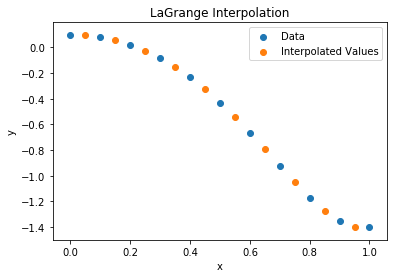

In [7]:
%matplotlib inline

import sys
sys.path.append("/home/elemley/engr3703")
from psm_plot import *

def lagrange(x,y,xval):
    summ = 0
    prod = 1
    n = len(x)
    for i in range(0, n):
        prod = 1
        for j in range(0, n):
            if i != j:
                prod = prod * (xval - x[j]) / (x[i] - x[j])
        summ += y[i] * prod
    yval = summ
    return yval


def main():
    # place code here to compute eq. 9 as discussed in the sums_and_products.pdf

    # ENGR3703 your code here

    x = [ 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    y = [0.1, 0.08023, 0.02016, -0.08351, -0.23408, -0.43125, -0.66752, -0.92459, -1.16976, -1.35233, -1.4]

    xvals = [0.05,.15,.25,0.35,0.45, 0.55,0.65,0.75,0.85,0.95]
    yvals = []
    for xval in xvals:
        yvals.append(lagrange(x,y,xval))


    TwoScatterColorsPlot111(x,y,"Data",xvals,yvals,"Interpolated Values","x","y","LaGrange Interpolation","lagrange_interp.png")

# please just leave this and don't change it...
# these next two lines make sure main() runs everytime this code file is executed
if __name__ == '__main__':
    main()
    